# FEATURE ENGINEERING
# FEATURE TRANSFROMATION
# BINNING OR DISCRETIZATION

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns



In [35]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [36]:
data = sns.load_dataset("titanic")

df = pd.DataFrame(data)

In [52]:
df.sample(5)

,age,fare,survived
119,2.0,31.2750,0
9,14.0,30.0708,1
748,19.0,53.1000,0
450,36.0,27.7500,0
341,24.0,263.0000,1


In [38]:
df = df[['age','fare','survived']]

In [50]:
df.isnull().sum()


age         0
fare        0
survived    0
dtype: int64

In [49]:
df.describe()
df.dropna(inplace=True)

In [53]:
X  = df.drop(columns=['survived'])
Y = df.iloc[:,-1]

In [54]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

In [55]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [56]:
x_train.head(5)

,age,fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [57]:
clf = DecisionTreeClassifier()

In [58]:
 # If appropriate for your data
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)


In [59]:
accuracy_score(y_test,y_pred)

0.6153846153846154

In [60]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy'))

np.float64(0.6317097026604068)

In [67]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [68]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [69]:
X_train_trf = trf.fit_transform(x_train)
X_test_trf = trf.transform(x_test)

c:\Users\SC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
c:\Users\SC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [70]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [71]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [74]:
output = pd.DataFrame({
    'age':x_train['age'],
    'age_trf':X_train_trf[:,0],
    'fare':x_train['fare'],
    'fare_trf':X_train_trf[:,1]
})

In [75]:
output['age_labels'] = pd.cut(x=x_train['age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x = x_train['fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [76]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
788,1.0,0.0,20.5750,8.0,"(0.42, 6.0]","(18.75, 26.0]"
474,22.0,4.0,9.8375,4.0,"(21.0, 23.0]","(8.158, 10.5]"
81,29.0,7.0,9.5000,4.0,"(28.0, 30.0]","(8.158, 10.5]"
308,30.0,8.0,24.0000,8.0,"(28.0, 30.0]","(18.75, 26.0]"
448,5.0,0.0,19.2583,8.0,"(0.42, 6.0]","(18.75, 26.0]"


In [77]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [78]:
accuracy_score(y_test,y_pred2)


0.6363636363636364

In [80]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy'))

c:\Users\SC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
c:\Users\SC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


np.float64(0.6345070422535211)

In [85]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.626056338028169


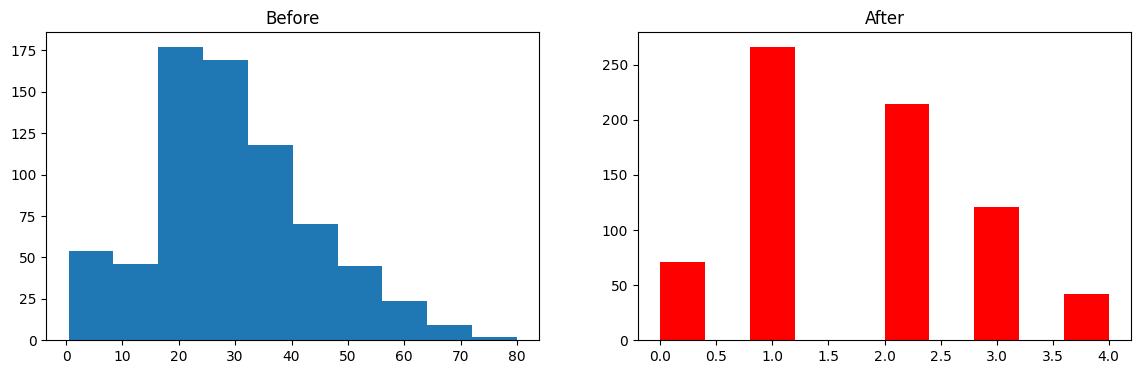

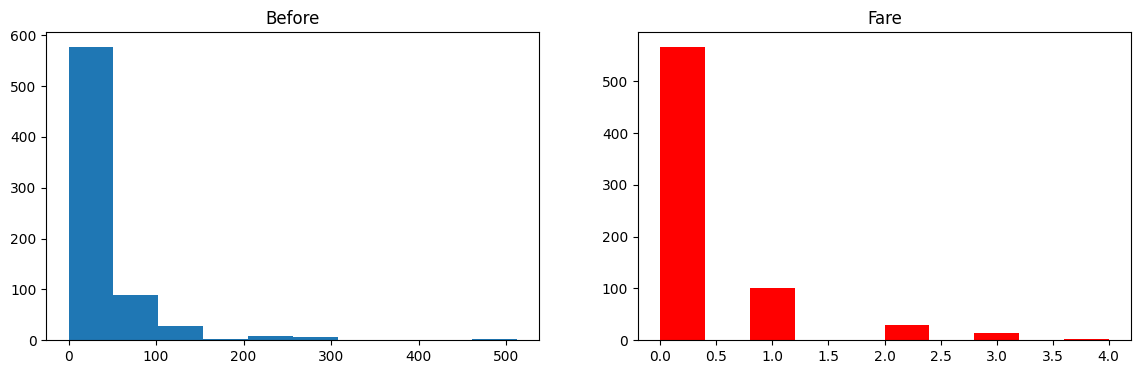

In [86]:
discretize(5,'kmeans')

0.6344874804381846


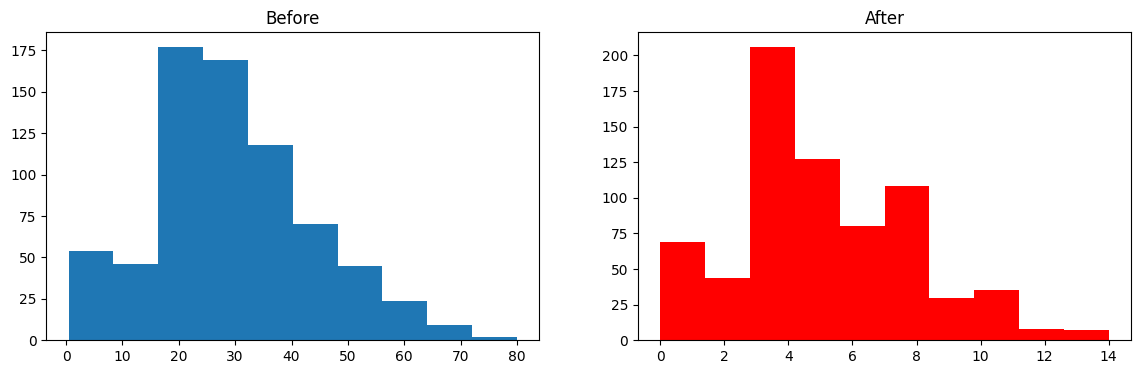

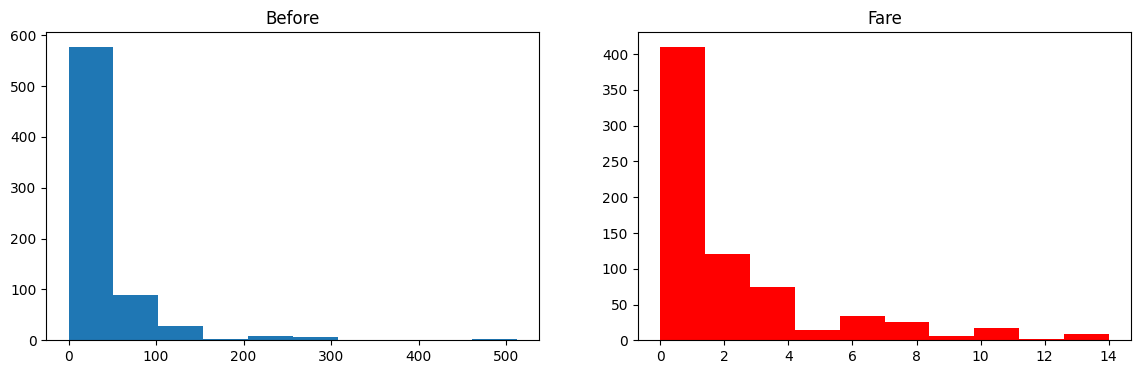

In [88]:
discretize(15,'kmeans')